In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptron

In [5]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state = 42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

In [6]:
per_clf.coef_

array([[-1.4, -2.2]])

In [7]:
per_clf.intercept_

array([4.])

# Activation functions

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

[-5, 5, -0.2, 1.2]

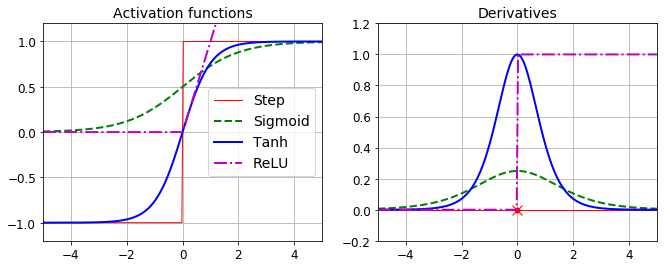

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

In [15]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation = heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


In [12]:
x1s = np.linspace(-0.2, 1.2, 100)
(x1s >= 0).astype(z.dtype)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

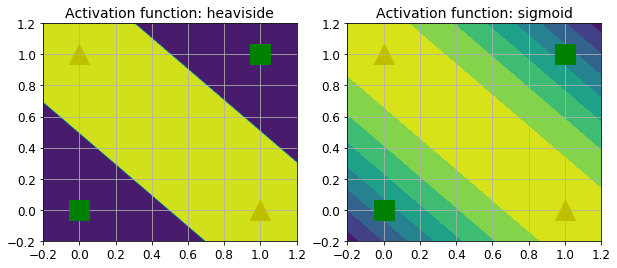

In [16]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

In [17]:
import tensorflow as tf
from tensorflow import keras

In [18]:
tf.__version__

'2.0.0'

In [19]:
keras.__version__

'2.2.4-tf'

In [20]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [21]:
X_train_full.shape

(60000, 28, 28)

In [22]:
X_train_full.dtype

dtype('uint8')

In [23]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

(-0.5, 27.5, 27.5, -0.5)

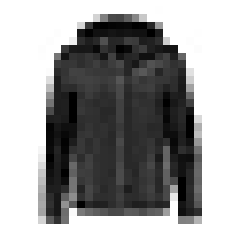

In [24]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")

In [25]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [28]:
class_names[y_train[0]]

'Coat'

In [29]:
X_valid.shape

(5000, 28, 28)

In [30]:
X_test.shape

(10000, 28, 28)

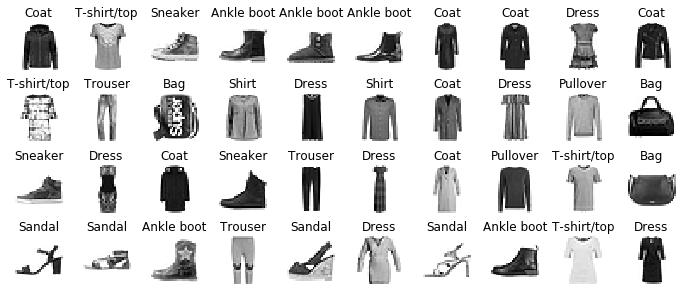

In [32]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [54]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [55]:
model.layers

In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [62]:
model.layers

In [63]:
model.summary()
# (784+1) * 300 = 23550
# (300+1) * 100 = 30100
# (100+1) * 10 = 1010

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [65]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [66]:
model.get_layer(hidden1.name) is hidden1

True

In [67]:
weights, biases = hidden1.get_weights()

In [70]:
weights.shape

(784, 300)

In [71]:
biases.shape

(300,)

In [72]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [73]:
history = model.fit(X_train, y_train, epochs= 30,
                   validation_data = (X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 8s 138us/sample - loss: 0.7228 - accuracy: 0.7623 - val_loss: 0.5304 - val_accuracy: 0.8162
Epoch 2/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4498 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.4379 - accuracy: 0.8472 - val_loss: 0.4172 - val_accuracy: 0.8552
Epoch 4/30
55000/55000 [==============================] - 4s 82us/sample - loss: 0.4126 - accuracy: 0.8554 - val_loss: 0.3900 - val_accuracy: 0.8650
Epoch 5/30
55000/55000 [==============================] - 5s 88us/sample - loss: 0.3928 - accuracy: 0.8627 - val_loss: 0.3957 - val_accuracy: 0.8624
Epoch 6/30
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3775 - accuracy: 0.8669 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/30
55000/55000 [==============================]

In [74]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [76]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [77]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(0, 1)

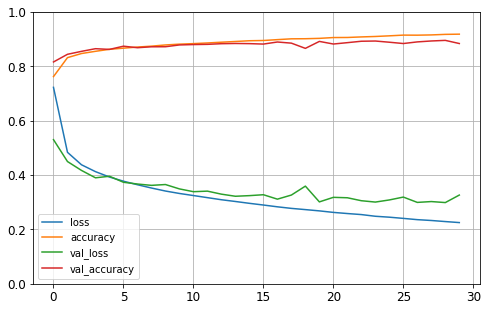

In [80]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [81]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3610996503472328, 0.8681]

In [82]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [83]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [84]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [85]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

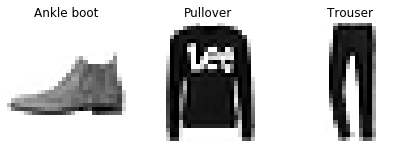

In [86]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

# Regression MLP

In [87]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [88]:
np.random.seed(42)
tf.random.set_seed(42)

In [93]:
X_train.shape

(11610, 8)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 118us/sample - loss: 1.0945 - val_loss: 0.5694
Epoch 2/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.4892 - val_loss: 0.4765
Epoch 3/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4444 - val_loss: 0.4563
Epoch 4/20
11610/11610 [==============================] - 1s 50us/sample - loss: 0.4276 - val_loss: 0.4420
Epoch 5/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4179 - val_loss: 0.4410
Epoch 6/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4098 - val_loss: 0.4434
Epoch 7/20
11610/11610 [==============================] - 1s 51us/sample - loss: 0.4037 - val_loss: 0.4230
Epoch 8/20
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3978 - val_loss: 0.4205
Epoch 9/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3923 - val_

In [23]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [24]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [25]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 92us/sample - loss: 2.2064 - val_loss: 0.9430
Epoch 2/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.7638 - val_loss: 0.6631
Epoch 3/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6165 - val_loss: 0.5995
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5670 - val_loss: 0.5685
Epoch 5/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5390 - val_loss: 0.5455
Epoch 6/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5197 - val_loss: 0.5318
Epoch 7/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5056 - val_loss: 0.5202
Epoch 8/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.4952 - val_loss: 0.5109
Epoch 9/20
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4869 - val_l

(0, 1)

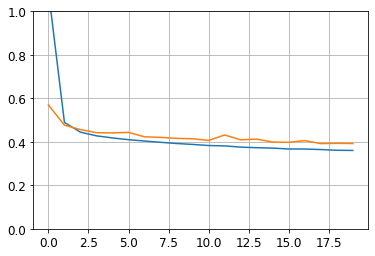

In [97]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [98]:
y_pred

array([[0.47386107],
       [1.6613617 ],
       [3.527051  ]], dtype=float32)

# Functional API

In [99]:
np.random.seed(42)
tf.random.set_seed(42)

In [102]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [103]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_2[0][0]                    
                                                                 dense_8[0][0]                

In [105]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)
y_pred

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 155us/sample - loss: 1.8901 - val_loss: 0.7310
Epoch 2/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6620 - val_loss: 0.6346
Epoch 3/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.6092 - val_loss: 0.6021
Epoch 4/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5774 - val_loss: 0.5775
Epoch 5/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5545 - val_loss: 0.5579
Epoch 6/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5375 - val_loss: 0.5426
Epoch 7/20
11610/11610 [==============================] - 1s 54us/sample - loss: 0.5233 - val_loss: 0.5296
Epoch 8/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5117 - val_loss: 0.5202
Epoch 9/20
11610/11610 [==============================] - 1s 53us/sample - loss: 0.5032 - val_

array([[0.530736 ],
       [1.6072054],
       [3.1096234]], dtype=float32)

In [106]:
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [110]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 105us/sample - loss: 1.8125 - val_loss: 0.7807
Epoch 2/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6993 - val_loss: 0.6436
Epoch 3/20
11610/11610 [==============================] - 1s 56us/sample - loss: 0.6244 - val_loss: 0.6063
Epoch 4/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5911 - val_loss: 0.5832
Epoch 5/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5684 - val_loss: 0.5671
Epoch 6/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5509 - val_loss: 0.5541
Epoch 7/20
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5373 - val_loss: 0.5424
Epoch 8/20
11610/11610 [==============================] - 1s 57us/sample - loss: 0.5259 - val_loss: 0.5338
Epoch 9/20
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5169 - val_

In [111]:
y_pred

array([[0.54720026],
       [1.8255339 ],
       [2.9280562 ]], dtype=float32)

### Adding an auxiliary output for regularization:

In [112]:
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                          outputs=[output, aux_output])

In [116]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1],
             optimizer=keras.optimizers.SGD(lr=1e-3))

In [117]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs = 20,
                   validation_data = ([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 183us/sample - loss: 2.3447 - main_output_loss: 2.2340 - aux_output_loss: 3.3323 - val_loss: 1.1488 - val_main_output_loss: 1.0180 - val_aux_output_loss: 2.3248
Epoch 2/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.9822 - main_output_loss: 0.8654 - aux_output_loss: 2.0325 - val_loss: 0.8738 - val_main_output_loss: 0.7700 - val_aux_output_loss: 1.8067
Epoch 3/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.8365 - main_output_loss: 0.7392 - aux_output_loss: 1.7106 - val_loss: 0.7927 - val_main_output_loss: 0.7019 - val_aux_output_loss: 1.6081
Epoch 4/20
11610/11610 [==============================] - 1s 63us/sample - loss: 0.7717 - main_output_loss: 0.6841 - aux_output_loss: 1.5595 - val_loss: 0.7467 - val_main_output_loss: 0.6641 - val_aux_output_loss: 1.4888
Epoch 5/20
11610/11610 [==============================] - 1s 63us/

In [118]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## The subclassing API

In [121]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel(30, activation = "relu")

In [122]:
model.compile(loss="mse", loss_weight=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                   validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 131us/sample - loss: 4.1531 - output_1_loss: 1.8484 - output_2_loss: 2.3032 - val_loss: 2.2871 - val_output_1_loss: 0.9396 - val_output_2_loss: 1.3470
Epoch 2/10
11610/11610 [==============================] - 1s 62us/sample - loss: 2.0740 - output_1_loss: 0.8297 - output_2_loss: 1.2440 - val_loss: 1.8871 - val_output_1_loss: 0.7441 - val_output_2_loss: 1.1426
Epoch 3/10
11610/11610 [==============================] - 1s 62us/sample - loss: 1.7660 - output_1_loss: 0.6998 - output_2_loss: 1.0657 - val_loss: 1.6630 - val_output_1_loss: 0.6643 - val_output_2_loss: 0.9985
Epoch 4/10
11610/11610 [==============================] - 1s 61us/sample - loss: 1.5704 - output_1_loss: 0.6342 - output_2_loss: 0.9361 - val_loss: 1.5035 - val_output_1_loss: 0.6155 - val_output_2_loss: 0.8877
Epoch 5/10
11610/11610 [==============================] - 1s 61us/sample - loss: 1.4309 - output_1_loss: 0

In [123]:
total_loss, main_loss, aux_loss

(1.1586963248807332, 0.50593144, 0.6557616)

In [124]:
y_pred_main, y_pred_aux

(array([[0.54280514],
        [1.7459489 ],
        [2.5229456 ]], dtype=float32),
 array([[0.96185654],
        [2.222928  ],
        [2.0338364 ]], dtype=float32))

## Saving and Restoring

In [125]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [126]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
hisotry = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 92us/sample - loss: 2.5214 - val_loss: 1.4442
Epoch 2/10
11610/11610 [==============================] - 1s 56us/sample - loss: 1.0620 - val_loss: 0.9196
Epoch 3/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.8352 - val_loss: 0.7970
Epoch 4/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.7620 - val_loss: 0.7508
Epoch 5/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.7202 - val_loss: 0.7163
Epoch 6/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6875 - val_loss: 0.6871
Epoch 7/10
11610/11610 [==============================] - 1s 53us/sample - loss: 0.6586 - val_loss: 0.6591
Epoch 8/10
11610/11610 [==============================] - 1s 51us/sample - loss: 0.6324 - val_loss: 0.6343
Epoch 9/10
11610/11610 [==============================] - 1s 52us/sample - loss: 0.6090 - val_l

In [127]:
model.save("my_keras_model.h5")

In [132]:
model = keras.models.load_model("my_keras_model.h5")
# This will work when using the Sequential API or the Functional API, but
# unfortunately not when using model subclassing. You can use save_weights() and
# load_weights() to at least save and restore the model parameters, but you will
# need to save and restore everything else yourself.

In [133]:
model.predict(X_new)

array([[0.8603501],
       [1.4603981],
       [2.465124 ]], dtype=float32)

In [134]:
model.save_weights("my_keras_weights.ckpt")

In [136]:
model.load_weights("my_keras_weights.ckpt")

## Using callbacks during Training

In [137]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [138]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [139]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                               save_best_only=True)
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 123us/sample - loss: 1.9289 - val_loss: 0.7753
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.6834 - val_loss: 0.6422
Epoch 3/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.6129 - val_loss: 0.6007
Epoch 4/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5763 - val_loss: 0.5717
Epoch 5/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.5488 - val_loss: 0.5493
Epoch 6/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5272 - val_loss: 0.5313
Epoch 7/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5103 - val_loss: 0.5156
Epoch 8/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4965 - val_loss: 0.5050
Epoch 9/10
11610/11610 [==============================] - 1s 69us/sample - loss: 0.4860 - val_

In [140]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data = (X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4701 - val_loss: 0.4830
Epoch 2/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4644 - val_loss: 0.4787
Epoch 3/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4601 - val_loss: 0.4735
Epoch 4/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4556 - val_loss: 0.4707
Epoch 5/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.4522 - val_loss: 0.4675
Epoch 6/100
11610/11610 [==============================] - 1s 64us/sample - loss: 0.4488 - val_loss: 0.4653
Epoch 7/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.4462 - val_loss: 0.4615
Epoch 8/100
11610/11610 [==============================] - 1s 76us/sample - loss: 0.4434 - val_loss: 0.4596
Epoch 9/100
11610/11610 [==============================] - 1s 65us/sample - loss: 0.44

Epoch 76/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.3675 - val_loss: 0.3931
Epoch 77/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3666 - val_loss: 0.3927
Epoch 78/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3659 - val_loss: 0.3921
Epoch 79/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3654 - val_loss: 0.3911
Epoch 80/100
11610/11610 [==============================] - 1s 60us/sample - loss: 0.3646 - val_loss: 0.3894
Epoch 81/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3641 - val_loss: 0.3896
Epoch 82/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3630 - val_loss: 0.3892
Epoch 83/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3625 - val_loss: 0.3888
Epoch 84/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.3618 - val_loss: 0.3872
Epoch 85/100
11610/

In [142]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def op_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [144]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=3,
                   validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/3
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3510 - val_loss: 0.3799
Epoch 2/3
11610/11610 [==============================] - 1s 53us/sample - loss: 0.3495 - val_loss: 0.3777
Epoch 3/3
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3491 - val_loss: 0.3760


# TesnorBoard

In [145]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [146]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2020_06_30-18_03_00'

In [147]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [148]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

In [149]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs = 30,
                   validation_data = (X_valid, y_valid),
                   callbacks= [tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 121us/sample - loss: 1.9289 - val_loss: 0.7753
Epoch 2/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6834 - val_loss: 0.6422
Epoch 3/30
11610/11610 [==============================] - 1s 67us/sample - loss: 0.6129 - val_loss: 0.6007
Epoch 4/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5763 - val_loss: 0.5717
Epoch 5/30
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5488 - val_loss: 0.5493
Epoch 6/30
11610/11610 [==============================] - 1s 56us/sample - loss: 0.5272 - val_loss: 0.5313
Epoch 7/30
11610/11610 [==============================] - 1s 58us/sample - loss: 0.5103 - val_loss: 0.5156
Epoch 8/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4965 - val_loss: 0.5050
Epoch 9/30
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4860 - val_

In [150]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 10128.

In [151]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " +str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

# Hyperparameter Tuning

In [152]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [153]:
def build_model(n_hidden = 1, n_neurons= 30, learning_rate = 3e-3,
               input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr =learning_rate)
    model.compile(loss="mse", optimizer = optimizer)
    return model

In [154]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
#  keras.wrappers.scikit_learn.KerasRegressor -> Implementation of the scikit-learn regressor API for Keras.

In [155]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data = (X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 95us/sample - loss: 1.2171 - val_loss: 0.7352
Epoch 2/100
11610/11610 [==============================] - 1s 56us/sample - loss: 0.7088 - val_loss: 0.5860
Epoch 3/100
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5469 - val_loss: 0.5407
Epoch 4/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.5106 - val_loss: 0.5132
Epoch 5/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4869 - val_loss: 0.4964
Epoch 6/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.4712 - val_loss: 0.4848
Epoch 7/100
11610/11610 [==============================] - 1s 61us/sample - loss: 0.4606 - val_loss: 0.4735
Epoch 8/100
11610/11610 [==============================] - 1s 55us/sample - loss: 0.4524 - val_loss: 0.4686
Epoch 9/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.446

Epoch 76/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3497 - val_loss: 0.3897
Epoch 77/100
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3490 - val_loss: 0.3893
Epoch 78/100
11610/11610 [==============================] - 1s 54us/sample - loss: 0.3487 - val_loss: 0.3890
Epoch 79/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3481 - val_loss: 0.3872
Epoch 80/100
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3476 - val_loss: 0.3880
Epoch 81/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3464 - val_loss: 0.3918
Epoch 82/100
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3467 - val_loss: 0.3870
Epoch 83/100
11610/11610 [==============================] - 1s 52us/sample - loss: 0.3458 - val_loss: 0.3865
Epoch 84/100
11610/11610 [==============================] - 1s 50us/sample - loss: 0.3455 - val_loss: 0.3864
Epoch 85/100
11610/

In [156]:
mse_test = keras_reg.score(X_test, y_test)
mse_test

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

-0.3601766087750132

In [157]:
y_pred = keras_reg.predict(X_new)
y_pred

array([0.4071941, 1.5482154, 3.7888856], dtype=float32)

In [158]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}

In [159]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter = 10, cv =3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data = (X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 3.1309 - val_loss: 1.4960
Epoch 2/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.9711 - val_loss: 0.7054
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.6105 - val_loss: 0.5689
Epoch 4/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5414 - val_loss: 0.5441
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5271 - val_loss: 0.5388
Epoch 6/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5236 - val_loss: 0.5375
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5225 - val_loss: 0.5371
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5217 - val_loss: 0.5366
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5213 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 108us/sample - loss: 3.0738 - val_loss: 1.6669
Epoch 2/100
7740/7740 [==============================] - 0s 51us/sample - loss: 1.1677 - val_loss: 0.8994
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.7631 - val_loss: 0.7251
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.6627 - val_loss: 0.6739
Epoch 5/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.6274 - val_loss: 0.6531
Epoch 6/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.6081 - val_loss: 0.6384
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5942 - val_loss: 0.6242
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5830 - val_loss: 0.6140
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5729 - val_loss: 0.60

7740/7740 [==============================] - 0s 52us/sample - loss: 0.5053 - val_loss: 0.5367
Epoch 78/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5050 - val_loss: 0.5367
Epoch 79/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5053 - val_loss: 0.5377
Epoch 80/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5052 - val_loss: 0.5371
Epoch 81/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5050 - val_loss: 0.5378
Epoch 82/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5048 - val_loss: 0.5364
Epoch 83/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5052 - val_loss: 0.5367
Epoch 84/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5049 - val_loss: 0.5365
Epoch 85/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.5054 - val_loss: 0.5367
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 104us/sample - loss: 3.3785 - val_loss: 1.4849
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 1.0378 - val_loss: 0.7520
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.6630 - val_loss: 0.6216
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5893 - val_loss: 0.5985
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5715 - val_loss: 0.5920
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5648 - val_loss: 0.5867
Epoch 7/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5605 - val_loss: 0.5838
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5575 - val_loss: 0.5819
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5544 - val_loss: 0.57

7740/7740 [==============================] - 0s 54us/sample - loss: 0.5245 - val_loss: 0.5371
Epoch 78/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5246 - val_loss: 0.5373
Epoch 79/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5246 - val_loss: 0.5383
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5245 - val_loss: 0.5374
Epoch 81/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.5247 - val_loss: 0.5376
Epoch 82/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5245 - val_loss: 0.5367
Epoch 83/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5246 - val_loss: 0.5372
Epoch 84/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5245 - val_loss: 0.5378
Epoch 85/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5246 - val_loss: 0.5383
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 111us/sample - loss: 1.3110 - val_loss: 0.5703
Epoch 2/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5418 - val_loss: 0.5473
Epoch 3/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5309 - val_loss: 0.5459
Epoch 4/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5256 - val_loss: 0.5423
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5234 - val_loss: 0.5436
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5237 - val_loss: 0.5394
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5238 - val_loss: 0.5363
Epoch 8/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5219 - val_loss: 0.5362
Epoch 9/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5222 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 100us/sample - loss: 1.4459 - val_loss: 0.6611
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5995 - val_loss: 0.5969
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5504 - val_loss: 0.5689
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5311 - val_loss: 0.5496
Epoch 5/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5186 - val_loss: 0.5625
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.6191 - val_loss: 0.5605
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5154 - val_loss: 0.5854
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5284 - val_loss: 0.5623
Epoch 9/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5074 - val_loss: 0.55

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 111us/sample - loss: 1.8722 - val_loss: 3.1691
Epoch 2/100
7740/7740 [==============================] - 0s 52us/sample - loss: 5.3874 - val_loss: 39.9594
Epoch 3/100
7740/7740 [==============================] - 0s 52us/sample - loss: 94.0963 - val_loss: 676.3196
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1468.9254 - val_loss: 11560.5257
Epoch 5/100
7740/7740 [==============================] - 0s 52us/sample - loss: 23580.9799 - val_loss: 202149.0078
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 411620.8257 - val_loss: 3420831.4161
Epoch 7/100
7740/7740 [==============================] - 0s 53us/sample - loss: 7933619.2279 - val_loss: 58389435.1722
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 119257658.8774 - val_loss: 1018185240.1628
Epoch 9/100
7740/7740 [===================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 132us/sample - loss: 2.9103 - val_loss: 1.4425
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.0694 - val_loss: 0.9731
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8503 - val_loss: 0.8179
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7700 - val_loss: 0.7599
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7281 - val_loss: 0.7253
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7003 - val_loss: 0.7002
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.6781 - val_loss: 0.6792
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6589 - val_loss: 0.6604
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6422 - val_loss: 0.64

7740/7740 [==============================] - 0s 61us/sample - loss: 0.4065 - val_loss: 0.4306
Epoch 78/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4056 - val_loss: 0.4308
Epoch 79/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4049 - val_loss: 0.4289
Epoch 80/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4039 - val_loss: 0.4290
Epoch 81/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4030 - val_loss: 0.4276
Epoch 82/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4024 - val_loss: 0.4280
Epoch 83/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4014 - val_loss: 0.4274
Epoch 84/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4007 - val_loss: 0.4264
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3999 - val_loss: 0.4244
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 132us/sample - loss: 2.5802 - val_loss: 1.2152
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.9993 - val_loss: 0.8566
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7908 - val_loss: 0.7653
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.7257 - val_loss: 0.7277
Epoch 5/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.6893 - val_loss: 0.7027
Epoch 6/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.6626 - val_loss: 0.6813
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6408 - val_loss: 0.6624
Epoch 8/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6217 - val_loss: 0.6452
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6043 - val_loss: 0.62

7740/7740 [==============================] - 0s 60us/sample - loss: 0.3954 - val_loss: 0.4305
Epoch 78/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3948 - val_loss: 0.4296
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3941 - val_loss: 0.4294
Epoch 80/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3933 - val_loss: 0.4287
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3925 - val_loss: 0.4284
Epoch 82/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3919 - val_loss: 0.4277
Epoch 83/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3914 - val_loss: 0.4274
Epoch 84/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.3906 - val_loss: 0.4266
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3900 - val_loss: 0.4261
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 159us/sample - loss: 2.8999 - val_loss: 1.4034
Epoch 2/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.0966 - val_loss: 0.8780
Epoch 3/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.8149 - val_loss: 0.7367
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.7254 - val_loss: 0.6890
Epoch 5/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.6839 - val_loss: 0.6644
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6569 - val_loss: 0.6466
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6360 - val_loss: 0.6310
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6183 - val_loss: 0.6162
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.6024 - val_loss: 0.60

7740/7740 [==============================] - 0s 61us/sample - loss: 0.3986 - val_loss: 0.4228
Epoch 78/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3981 - val_loss: 0.4225
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3974 - val_loss: 0.4224
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3966 - val_loss: 0.4216
Epoch 81/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3960 - val_loss: 0.4212
Epoch 82/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3954 - val_loss: 0.4202
Epoch 83/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3949 - val_loss: 0.4201
Epoch 84/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3942 - val_loss: 0.4195
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3936 - val_loss: 0.4192
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 125us/sample - loss: 3.5374 - val_loss: 2.4530
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.9358 - val_loss: 1.7961
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.5207 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 0s 62us/sample - loss: 1.2715 - val_loss: 1.1836
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.0967 - val_loss: 1.0284
Epoch 6/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.9678 - val_loss: 0.9174
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8717 - val_loss: 0.8389
Epoch 8/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.8022 - val_loss: 0.7822
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7531 - val_loss: 0.74

7740/7740 [==============================] - 0s 58us/sample - loss: 0.4543 - val_loss: 0.4713
Epoch 78/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4529 - val_loss: 0.4706
Epoch 79/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4518 - val_loss: 0.4690
Epoch 80/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4504 - val_loss: 0.4681
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4490 - val_loss: 0.4665
Epoch 82/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4482 - val_loss: 0.4659
Epoch 83/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4468 - val_loss: 0.4647
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4458 - val_loss: 0.4636
Epoch 85/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4447 - val_loss: 0.4619
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 136us/sample - loss: 3.6845 - val_loss: 2.5219
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 1.8661 - val_loss: 1.5045
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.2922 - val_loss: 1.1508
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.0394 - val_loss: 0.9496
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8773 - val_loss: 0.8202
Epoch 6/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.7700 - val_loss: 0.7386
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6995 - val_loss: 0.6868
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6528 - val_loss: 0.6544
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6215 - val_loss: 0.63

7740/7740 [==============================] - 0s 63us/sample - loss: 0.4150 - val_loss: 0.4526
Epoch 78/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4144 - val_loss: 0.4521
Epoch 79/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4139 - val_loss: 0.4517
Epoch 80/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4133 - val_loss: 0.4511
Epoch 81/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4127 - val_loss: 0.4507
Epoch 82/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.4122 - val_loss: 0.4501
Epoch 83/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4117 - val_loss: 0.4496
Epoch 84/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4112 - val_loss: 0.4491
Epoch 85/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4106 - val_loss: 0.4485
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 141us/sample - loss: 3.1927 - val_loss: 1.8926
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.2822 - val_loss: 1.1302
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.9133 - val_loss: 0.8854
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8012 - val_loss: 0.7741
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7437 - val_loss: 0.7190
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.7086 - val_loss: 0.6902
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6844 - val_loss: 0.6715
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.6657 - val_loss: 0.6571
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.6501 - val_loss: 0.64

7740/7740 [==============================] - 0s 61us/sample - loss: 0.4160 - val_loss: 0.4445
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4153 - val_loss: 0.4439
Epoch 79/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4145 - val_loss: 0.4433
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4137 - val_loss: 0.4427
Epoch 81/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4129 - val_loss: 0.4416
Epoch 82/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4122 - val_loss: 0.4409
Epoch 83/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4115 - val_loss: 0.4406
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4107 - val_loss: 0.4397
Epoch 85/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.4100 - val_loss: 0.4389
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 164us/sample - loss: 1.7921 - val_loss: 0.6087
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5743 - val_loss: 0.5763
Epoch 3/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5525 - val_loss: 0.5615
Epoch 4/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5403 - val_loss: 0.5516
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5325 - val_loss: 0.5517
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.5292 - val_loss: 0.5456
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5267 - val_loss: 0.5409
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5238 - val_loss: 0.5395
Epoch 9/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5231 - val_loss: 0.53

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 109us/sample - loss: 1.8640 - val_loss: 0.6333
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5887 - val_loss: 0.5996
Epoch 3/100
7740/7740 [==============================] - 1s 82us/sample - loss: 0.6468 - val_loss: 0.5714
Epoch 4/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.6144 - val_loss: 0.5668
Epoch 5/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5267 - val_loss: 0.5608
Epoch 6/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5821 - val_loss: 0.5708
Epoch 7/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5291 - val_loss: 0.5885
Epoch 8/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5417 - val_loss: 0.5878
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5278 - val_loss: 0.57

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 114us/sample - loss: 2.1890 - val_loss: 1.2177
Epoch 2/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.7033 - val_loss: 4.0684
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 8.5543 - val_loss: 23.7152
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 49.3870 - val_loss: 152.3755
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 315.5810 - val_loss: 1033.3799
Epoch 6/100
7740/7740 [==============================] - 1s 68us/sample - loss: 2103.4387 - val_loss: 6724.4691
Epoch 7/100
7740/7740 [==============================] - 0s 59us/sample - loss: 14768.4010 - val_loss: 44200.8501
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 91391.2981 - val_loss: 298219.9452
Epoch 9/100
7740/7740 [==============================] - 0s 56us/sample

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 128us/sample - loss: 0.9304 - val_loss: 0.6162
Epoch 2/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.5650 - val_loss: 0.5447
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5078 - val_loss: 0.5151
Epoch 4/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4776 - val_loss: 0.4939
Epoch 5/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4635 - val_loss: 0.4812
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4533 - val_loss: 0.4712
Epoch 7/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4449 - val_loss: 0.4629
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4383 - val_loss: 0.4573
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4331 - val_loss: 0.45

7740/7740 [==============================] - 0s 60us/sample - loss: 0.3291 - val_loss: 0.3722
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3285 - val_loss: 0.3794
Epoch 79/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3299 - val_loss: 0.3711
Epoch 80/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3271 - val_loss: 0.3754
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3275 - val_loss: 0.3714
Epoch 82/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3275 - val_loss: 0.3697
Epoch 83/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3249 - val_loss: 0.3883
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3265 - val_loss: 0.3694
Epoch 85/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3276 - val_loss: 0.3684
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 1.5812 - val_loss: 0.5893
Epoch 2/100
7740/7740 [==============================] - 0s 49us/sample - loss: 0.5001 - val_loss: 0.5174
Epoch 3/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5237 - val_loss: 0.5048
Epoch 4/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.4826 - val_loss: 0.4626
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.4211 - val_loss: 0.4509
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4080 - val_loss: 0.4414
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 0.4016 - val_loss: 0.4381
Epoch 8/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3959 - val_loss: 0.4319
Epoch 9/100
7740/7740 [==============================] - 0s 51us/sample - loss: 0.3914 - val_loss: 0.43

7740/7740 [==============================] - 0s 53us/sample - loss: 0.3198 - val_loss: 0.3701
Epoch 78/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3185 - val_loss: 0.3653
Epoch 79/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3197 - val_loss: 0.3680
Epoch 80/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3168 - val_loss: 0.3669
Epoch 81/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3182 - val_loss: 0.3639
Epoch 82/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3172 - val_loss: 0.3673
Epoch 83/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3178 - val_loss: 0.3731
Epoch 84/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3160 - val_loss: 0.3662
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3173 - val_loss: 0.3649
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 188us/sample - loss: 1.1751 - val_loss: 2.3151
Epoch 2/100
7740/7740 [==============================] - 1s 68us/sample - loss: 4.9909 - val_loss: 3.9958
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.7664 - val_loss: 0.4896
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.4871 - val_loss: 0.4671
Epoch 5/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4330 - val_loss: 0.4291
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4065 - val_loss: 0.4162
Epoch 7/100
7740/7740 [==============================] - 1s 74us/sample - loss: 0.3935 - val_loss: 0.4084
Epoch 8/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.3841 - val_loss: 0.4038
Epoch 9/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.3761 - val_loss: 0.41

7740/7740 [==============================] - 0s 61us/sample - loss: 0.3119 - val_loss: 0.3620
Epoch 78/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3135 - val_loss: 0.3539
Epoch 79/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3135 - val_loss: 0.3552
Epoch 80/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3106 - val_loss: 0.3670
Epoch 81/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3111 - val_loss: 0.3546
Epoch 82/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3109 - val_loss: 0.3558
Epoch 83/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3123 - val_loss: 0.3599
Epoch 84/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3108 - val_loss: 0.3517
Epoch 85/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3130 - val_loss: 0.3517
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 143us/sample - loss: 4.8603 - val_loss: 3.3452
Epoch 2/100
7740/7740 [==============================] - 1s 68us/sample - loss: 2.3511 - val_loss: 1.6455
Epoch 3/100
7740/7740 [==============================] - ETA: 0s - loss: 1.286 - 0s 64us/sample - loss: 1.2719 - val_loss: 1.0713
Epoch 4/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.9549 - val_loss: 0.9180
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.8533 - val_loss: 0.8495
Epoch 6/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7965 - val_loss: 0.8028
Epoch 7/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.7574 - val_loss: 0.7705
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.7292 - val_loss: 0.7469
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss:

Epoch 77/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4617 - val_loss: 0.4814
Epoch 78/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4607 - val_loss: 0.4806
Epoch 79/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4598 - val_loss: 0.4797
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4589 - val_loss: 0.4787
Epoch 81/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4579 - val_loss: 0.4778
Epoch 82/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4572 - val_loss: 0.4770
Epoch 83/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4563 - val_loss: 0.4763
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4556 - val_loss: 0.4753
Epoch 85/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4547 - val_loss: 0.4741
Epoch 86/100
7740/7740 [=============

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 139us/sample - loss: 4.1199 - val_loss: 3.0772
Epoch 2/100
7740/7740 [==============================] - 0s 61us/sample - loss: 2.4049 - val_loss: 1.9039
Epoch 3/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.6536 - val_loss: 1.4212
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 1.3519 - val_loss: 1.1959
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.1750 - val_loss: 1.0621
Epoch 6/100
7740/7740 [==============================] - 0s 65us/sample - loss: 1.0527 - val_loss: 0.9729
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.9647 - val_loss: 0.9079
Epoch 8/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.9023 - val_loss: 0.8680
Epoch 9/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.8563 - val_loss: 0.83

7740/7740 [==============================] - 0s 60us/sample - loss: 0.4756 - val_loss: 0.5113
Epoch 78/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4740 - val_loss: 0.5093
Epoch 79/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4724 - val_loss: 0.5077
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4707 - val_loss: 0.5061
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4691 - val_loss: 0.5044
Epoch 82/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4676 - val_loss: 0.5033
Epoch 83/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.4663 - val_loss: 0.5016
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4648 - val_loss: 0.5001
Epoch 85/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4634 - val_loss: 0.4985
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 129us/sample - loss: 4.3360 - val_loss: 3.0110
Epoch 2/100
7740/7740 [==============================] - 0s 59us/sample - loss: 2.2720 - val_loss: 1.7911
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.5072 - val_loss: 1.3467
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.2098 - val_loss: 1.1063
Epoch 5/100
7740/7740 [==============================] - 1s 65us/sample - loss: 1.0323 - val_loss: 0.9526
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.9124 - val_loss: 0.8563
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.8329 - val_loss: 0.7957
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7803 - val_loss: 0.7565
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.7451 - val_loss: 0.73

7740/7740 [==============================] - 0s 58us/sample - loss: 0.4690 - val_loss: 0.4803
Epoch 78/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4680 - val_loss: 0.4795
Epoch 79/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4670 - val_loss: 0.4788
Epoch 80/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4660 - val_loss: 0.4779
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4650 - val_loss: 0.4767
Epoch 82/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4640 - val_loss: 0.4755
Epoch 83/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4630 - val_loss: 0.4749
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4621 - val_loss: 0.4741
Epoch 85/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4611 - val_loss: 0.4734
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 123us/sample - loss: 1.2775 - val_loss: 0.6673
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.6233 - val_loss: 0.5851
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5621 - val_loss: 0.5505
Epoch 4/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5273 - val_loss: 0.5482
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5075 - val_loss: 0.5107
Epoch 6/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4933 - val_loss: 0.5010
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4832 - val_loss: 0.4923
Epoch 8/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.4698 - val_loss: 0.4818
Epoch 9/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4646 - val_loss: 0.47

7740/7740 [==============================] - 0s 55us/sample - loss: 0.3510 - val_loss: 0.3830
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3486 - val_loss: 0.3916
Epoch 79/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3518 - val_loss: 0.3839
Epoch 80/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3495 - val_loss: 0.3832
Epoch 81/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3490 - val_loss: 0.3814
Epoch 82/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3465 - val_loss: 0.3801
Epoch 83/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3469 - val_loss: 0.3866
Epoch 84/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.3521 - val_loss: 0.3859
Epoch 85/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3467 - val_loss: 0.3782
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 177us/sample - loss: 2.2720 - val_loss: 0.6691
Epoch 2/100
7740/7740 [==============================] - 0s 50us/sample - loss: 0.5970 - val_loss: 0.5996
Epoch 3/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5364 - val_loss: 0.5584
Epoch 4/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5044 - val_loss: 0.5315
Epoch 5/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4814 - val_loss: 0.5173
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4653 - val_loss: 0.5000
Epoch 7/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.4538 - val_loss: 0.4905
Epoch 8/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4440 - val_loss: 0.4836
Epoch 9/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.4368 - val_loss: 0.48

7740/7740 [==============================] - 0s 58us/sample - loss: 0.3424 - val_loss: 0.3943
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3420 - val_loss: 0.3937
Epoch 79/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3422 - val_loss: 0.3943
Epoch 80/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3405 - val_loss: 0.3931
Epoch 81/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3409 - val_loss: 0.3936
Epoch 82/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3407 - val_loss: 0.3929
Epoch 83/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3409 - val_loss: 0.3940
Epoch 84/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.3400 - val_loss: 0.3918
Epoch 85/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3398 - val_loss: 0.3929
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 170us/sample - loss: 1.5067 - val_loss: 1.2099
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 2.1642 - val_loss: 0.8728
Epoch 3/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.7435 - val_loss: 0.6528
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6031 - val_loss: 0.5628
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5380 - val_loss: 0.5223
Epoch 6/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5047 - val_loss: 0.5071
Epoch 7/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4847 - val_loss: 0.4869
Epoch 8/100
7740/7740 [==============================] - 1s 68us/sample - loss: 0.4686 - val_loss: 0.4703
Epoch 9/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.4563 - val_loss: 0.46

7740/7740 [==============================] - 1s 66us/sample - loss: 0.3419 - val_loss: 0.3814
Epoch 78/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3424 - val_loss: 0.3784
Epoch 79/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3417 - val_loss: 0.3799
Epoch 80/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.3400 - val_loss: 0.3837
Epoch 81/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3400 - val_loss: 0.3794
Epoch 82/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3399 - val_loss: 0.3770
Epoch 83/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3392 - val_loss: 0.3817
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3388 - val_loss: 0.3743
Epoch 85/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3384 - val_loss: 0.3742
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 110us/sample - loss: 5.9370 - val_loss: 5.1588
Epoch 2/100
7740/7740 [==============================] - 0s 54us/sample - loss: 4.3951 - val_loss: 3.8435
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 3.3331 - val_loss: 2.9398
Epoch 4/100
7740/7740 [==============================] - 0s 57us/sample - loss: 2.5914 - val_loss: 2.3104
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 2.0665 - val_loss: 1.8662
Epoch 6/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.6911 - val_loss: 1.5492
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 1.4204 - val_loss: 1.3206
Epoch 8/100
7740/7740 [==============================] - 0s 53us/sample - loss: 1.2237 - val_loss: 1.1549
Epoch 9/100
7740/7740 [==============================] - 0s 53us/sample - loss: 1.0797 - val_loss: 1.03

7740/7740 [==============================] - 0s 62us/sample - loss: 0.5505 - val_loss: 0.5674
Epoch 78/100
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5497 - val_loss: 0.5667
Epoch 79/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5490 - val_loss: 0.5660
Epoch 80/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.5483 - val_loss: 0.5653
Epoch 81/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5476 - val_loss: 0.5647
Epoch 82/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.5469 - val_loss: 0.5640
Epoch 83/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.5462 - val_loss: 0.5634
Epoch 84/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5456 - val_loss: 0.5628
Epoch 85/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5450 - val_loss: 0.5621
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 112us/sample - loss: 7.4616 - val_loss: 6.4096
Epoch 2/100
7740/7740 [==============================] - 0s 55us/sample - loss: 5.6554 - val_loss: 4.8948
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 4.3358 - val_loss: 3.7832
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 3.3674 - val_loss: 2.9664
Epoch 5/100
7740/7740 [==============================] - 0s 53us/sample - loss: 2.6556 - val_loss: 2.3654
Epoch 6/100
7740/7740 [==============================] - 0s 56us/sample - loss: 2.1315 - val_loss: 1.9232
Epoch 7/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.7448 - val_loss: 1.5972
Epoch 8/100
7740/7740 [==============================] - 0s 59us/sample - loss: 1.4592 - val_loss: 1.3572
Epoch 9/100
7740/7740 [==============================] - 0s 55us/sample - loss: 1.2479 - val_loss: 1.18

7740/7740 [==============================] - 0s 54us/sample - loss: 0.5485 - val_loss: 0.5981
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5477 - val_loss: 0.5972
Epoch 79/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5470 - val_loss: 0.5965
Epoch 80/100
7740/7740 [==============================] - 0s 54us/sample - loss: 0.5463 - val_loss: 0.5956
Epoch 81/100
7740/7740 [==============================] - 0s 53us/sample - loss: 0.5456 - val_loss: 0.5949
Epoch 82/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5449 - val_loss: 0.5939
Epoch 83/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5442 - val_loss: 0.5931
Epoch 84/100
7740/7740 [==============================] - 0s 55us/sample - loss: 0.5435 - val_loss: 0.5922
Epoch 85/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5429 - val_loss: 0.5915
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 110us/sample - loss: 9.0418 - val_loss: 7.5673
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 6.4076 - val_loss: 5.3987
Epoch 3/100
7740/7740 [==============================] - 0s 53us/sample - loss: 4.6382 - val_loss: 3.9413
Epoch 4/100
7740/7740 [==============================] - 0s 55us/sample - loss: 3.4358 - val_loss: 2.9509
Epoch 5/100
7740/7740 [==============================] - 0s 54us/sample - loss: 2.6098 - val_loss: 2.2699
Epoch 6/100
7740/7740 [==============================] - 0s 53us/sample - loss: 2.0369 - val_loss: 1.7965
Epoch 7/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.6355 - val_loss: 1.4645
Epoch 8/100
7740/7740 [==============================] - 0s 52us/sample - loss: 1.3522 - val_loss: 1.2302
Epoch 9/100
7740/7740 [==============================] - 0s 56us/sample - loss: 1.1508 - val_loss: 1.06

7740/7740 [==============================] - 0s 57us/sample - loss: 0.5508 - val_loss: 0.5694
Epoch 78/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5502 - val_loss: 0.5689
Epoch 79/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.5497 - val_loss: 0.5684
Epoch 80/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5492 - val_loss: 0.5678
Epoch 81/100
7740/7740 [==============================] - 0s 56us/sample - loss: 0.5487 - val_loss: 0.5674
Epoch 82/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.5482 - val_loss: 0.5668
Epoch 83/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5478 - val_loss: 0.5663
Epoch 84/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.5473 - val_loss: 0.5659
Epoch 85/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.5468 - val_loss: 0.5655
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 134us/sample - loss: 1.2618 - val_loss: 0.6954
Epoch 2/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.6411 - val_loss: 0.6133
Epoch 3/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5786 - val_loss: 0.5663
Epoch 4/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.5344 - val_loss: 0.5341
Epoch 5/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.5045 - val_loss: 0.5090
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4825 - val_loss: 0.4939
Epoch 7/100
7740/7740 [==============================] - 1s 71us/sample - loss: 0.4672 - val_loss: 0.4813
Epoch 8/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4549 - val_loss: 0.4728
Epoch 9/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.4472 - val_loss: 0.46

7740/7740 [==============================] - 0s 59us/sample - loss: 0.3165 - val_loss: 0.3638
Epoch 78/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3151 - val_loss: 0.3698
Epoch 79/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3155 - val_loss: 0.3611
Epoch 80/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.3137 - val_loss: 0.3645
Epoch 81/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3132 - val_loss: 0.3615
Epoch 82/100
7740/7740 [==============================] - 0s 57us/sample - loss: 0.3131 - val_loss: 0.3603
Epoch 83/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3109 - val_loss: 0.3679
Epoch 84/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3109 - val_loss: 0.3608
Epoch 85/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3105 - val_loss: 0.3579
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.3574 - val_loss: 0.6590
Epoch 2/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.6115 - val_loss: 0.5842
Epoch 3/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.5236 - val_loss: 0.5308
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4863 - val_loss: 0.5035
Epoch 5/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4637 - val_loss: 0.4872
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4479 - val_loss: 0.4717
Epoch 7/100
7740/7740 [==============================] - 0s 62us/sample - loss: 0.4367 - val_loss: 0.4627
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4280 - val_loss: 0.4546
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.4207 - val_loss: 0.45

7740/7740 [==============================] - 0s 59us/sample - loss: 0.3151 - val_loss: 0.3699
Epoch 78/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3154 - val_loss: 0.3678
Epoch 79/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3150 - val_loss: 0.3675
Epoch 80/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.3131 - val_loss: 0.3674
Epoch 81/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3150 - val_loss: 0.3654
Epoch 82/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.3123 - val_loss: 0.3672
Epoch 83/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3144 - val_loss: 0.3689
Epoch 84/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3114 - val_loss: 0.3629
Epoch 85/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3119 - val_loss: 0.3638
Epoch 86/100
7740/7740 [==========================

Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 129us/sample - loss: 1.7206 - val_loss: 0.7433
Epoch 2/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.9152 - val_loss: 1.1026
Epoch 3/100
7740/7740 [==============================] - 0s 60us/sample - loss: 1.7471 - val_loss: 0.5889
Epoch 4/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.5608 - val_loss: 0.5501
Epoch 5/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5286 - val_loss: 0.5255
Epoch 6/100
7740/7740 [==============================] - 0s 61us/sample - loss: 0.5047 - val_loss: 0.5095
Epoch 7/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4881 - val_loss: 0.4929
Epoch 8/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.4753 - val_loss: 0.4839
Epoch 9/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.4646 - val_loss: 0.47

7740/7740 [==============================] - 0s 63us/sample - loss: 0.3220 - val_loss: 0.3639
Epoch 78/100
7740/7740 [==============================] - 0s 63us/sample - loss: 0.3223 - val_loss: 0.3624
Epoch 79/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3218 - val_loss: 0.3640
Epoch 80/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3202 - val_loss: 0.3636
Epoch 81/100
7740/7740 [==============================] - 0s 58us/sample - loss: 0.3199 - val_loss: 0.3624
Epoch 82/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.3194 - val_loss: 0.3620
Epoch 83/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3190 - val_loss: 0.3686
Epoch 84/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.3183 - val_loss: 0.3576
Epoch 85/100
7740/7740 [==============================] - 0s 65us/sample - loss: 0.3179 - val_loss: 0.3621
Epoch 86/100
7740/7740 [==========================

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000176F9B05B08>, as the constructor either does not set or modifies parameter learning_rate

In [160]:
rnd_search_cv.best_params_

{'learning_rate': 0.0033625641252688094, 'n_hidden': 2, 'n_neurons': 42}

In [161]:
rnd_search_cv.best_score_

-0.32296041147037374

In [162]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [163]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [164]:
model = rnd_search_cv.best_estimator_.model
model

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [165]:
model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.4334330166957175

# 10

In [166]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [167]:
X_train_full.shape

(60000, 28, 28)

In [168]:
X_train_full.dtype

dtype('uint8')

In [169]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

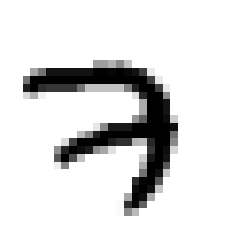

In [170]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')

In [171]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [172]:
X_valid.shape

(5000, 28, 28)

In [173]:
X_test.shape

(10000, 28, 28)

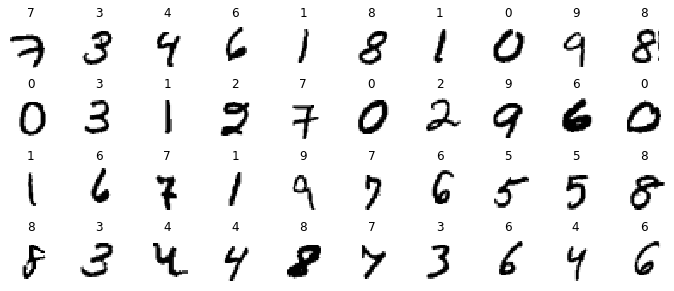

In [174]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [175]:
K = keras.backend

class ExponentiallearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [176]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])